In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.max_rows", 10)

In [3]:
df = pd.read_csv("anime_filtered.csv")
df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,...,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14470,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,...,NaN,NaN,NaN,[],Studio Lotus,NaN,NaN,Comedy,[],[]
14471,37897,Godzilla: Hoshi wo Kuu Mono,NaN,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,Not yet aired,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14472,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,日本昔ばなし 三ねん寝太郎,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Fantasy, Kids",[],[]


### Gênero

Ao analisar o banco de dados, queremos esclarecer se o gênero de um anime pode ou não impactar na sua nota ou popularidade.

A nota é um número individual para cada anime. É a média da nota dada por todos os usuários do MyAnimeList que avaliaram o anime, e vai de 0 a 10.
A popularidade é um número único para cada anime, de 1 a 14474 (número total de animes registrados), que ranqueia os animes por maior número de espectadores registrados.

Vamos analisar a média de notas e a média de popularidade de animes e tentar traçar uma relação com o gênero.

Separando os dados de forma mais organizada para isso:

In [4]:
## Separando apenas os dados que serão usados
anime_df = df[["anime_id", "title", "score", "rank", "popularity", "genre"]]
anime_df

,anime_id,title,score,rank,popularity,genre
0,11013,Inu x Boku SS,7.63,1274.0,231,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,7.89,727.0,366,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,7.55,1508.0,1173,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,8.21,307.0,916,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,8.67,50.0,426,"Comedy, Drama, Romance, Shounen"
...,...,...,...,...,...,...
14469,26089,Gutchonpa Omoshiro Hanashi,5.50,10337.0,13598,Kids
14470,21525,Geba Geba Shou Time!,4.60,10236.0,13284,Comedy
14471,37897,Godzilla: Hoshi wo Kuu Mono,0.00,NaN,7226,"Action, Sci-Fi, Adventure, Fantasy"
14472,34193,Nippon Mukashibanashi: Sannen Netarou,6.00,11557.0,14334,"Fantasy, Kids"


In [5]:
## Tratando dados categóricos de gênero
anime_df["genre"] = anime_df["genre"].str.replace(" ", "")
pd.set_option("display.max_columns", 100)
genres_df = anime_df["genre"].str.get_dummies(sep=',')
anime_df = anime_df.join(genres_df)

/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
## Criando uma lista com todos os gêneros
list_of_genres = genres_df.apply(pd.Series.value_counts).iloc[1].sort_values(ascending = False)
list_of_genres

Comedy       5250
Action       3253
Fantasy      2701
Adventure    2582
Drama        2294
             ... 
Josei          81
ShounenAi      79
ShoujoAi       67
Yuri           41
Yaoi           39
Name: 1, Length: 43, dtype: int64

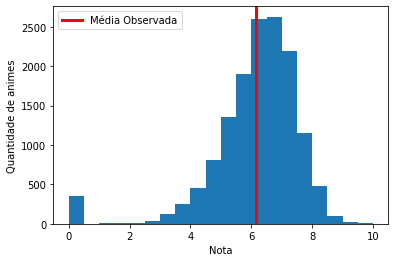

In [7]:
# Histograma das notas de todos os animes
plt.hist(anime_df["score"], bins = 20)
score_mean = anime_df["score"].mean()
mean_line = plt.axvline(x=score_mean, lw=3, color='red', label='Média Observada')
plt.legend()
plt.ylabel('Quantidade de animes')
plt.xlabel('Nota')

plt.show()

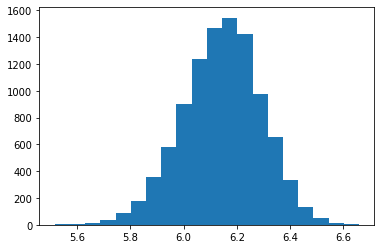

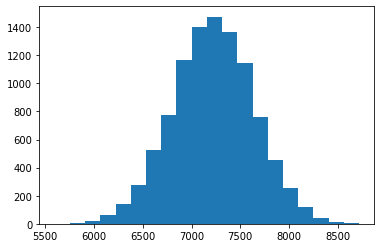

In [8]:
## Computando a estatística de teste (média de nota) para uma amostra da população
def compute_mean(df, column):
    return df[column].mean()

## Gerando uma amostra aleatória de 100 (ou outro número) animes da população, sem reposição
def compute_mean_random_sample(df, column, size=100):
    random_sample = df.sample(n=size, replace=False)
    return compute_mean(random_sample, column)

## Fazendo 10000 (ou outro número) de amostras aleatórias e computando a estatística
def compute_mean_model(df, column, sample_size=100, sample_count=10000):
    sample_means = np.array([])
    for i in range(sample_count):
        sample_means = np.append(sample_means, np.array([compute_mean_random_sample(df, column, size=sample_size)]))
    return sample_means

random_score_results = compute_mean_model(anime_df, "score")
plt.hist(random_score_results, bins = 20)
plt.show()
random_pop_results = compute_mean_model(anime_df, "popularity")
plt.hist(random_pop_results, bins = 20)
plt.show()

def compute_confidence_interval(array, conf=99):
    conf_dist = 100 - conf
    return np.array([np.percentile(array, conf_dist), np.percentile(array, conf)])

score_confidence_interval = compute_confidence_interval(random_score_results)
pop_confidence_interval = compute_confidence_interval(random_pop_results)

O gráfico acima é o histograma da média das notas de 10000 amostras aleatórias de 100 animes, tiradas da população original. Representa a hipótese nula, ou seja, um modelo em que a diferença de média de nota de animes é apenas devido à chance.

Para o teste, é pegada a média de animes com gêneros específicos, e comparada ao dado histograma, para verificar se a hipótese nula pode ou não ser confirmada:

In [9]:
## Plotando os testes de hipótese

def plot_hypothesis_test_genre(results, column, conf_interval):
    plt.figure(figsize=(20,10)) 
    plt.hist(results, bins = 20, alpha=0.6)
    for genre in list_of_genres.index.values:
        genre_mean = anime_df.loc[anime_df[genre] == 1][column].mean()
        plt.scatter(genre_mean, 0, color=np.random.rand(3,), label=genre)
    plt.legend(loc=2, prop={'size': 12}, ncol=3)
    plt.xlabel(column)
    plt.axvline(x=conf_interval[0], lw=1.5, color='red')
    plt.axvline(x=conf_interval[1], lw=1.5, color='red')
    plt.show()

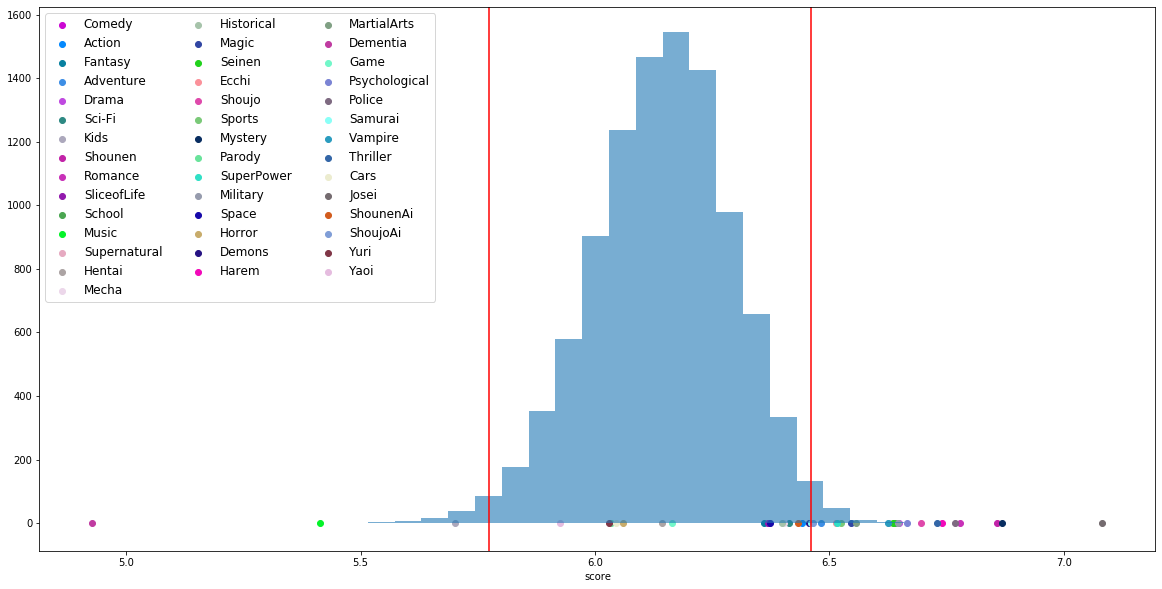

In [10]:
plot_hypothesis_test_genre(random_score_results, "score", score_confidence_interval)

As linhas verticais vermelhas são o intervalo de confiança de 99% do modelo aleatório.

Observando o gráfico acima, é claro que vários gêneros estão fora desse intervalo de confiança, logo pode-se rejeitar com algum grau de certeza a hipótese nula de que a variação de nota de animes seria apenas por chance.

Além disso, pode-se dizer que as estatísticas favorecem a hipótese alternativa de que o gênero impacta na nota de um anime. Animes de gêneros mais populares (como Shounen e Mistério, por exemplo) estão com médias de notas bem mais altas em relação ao modelo aleatório (6.86 e 6.87, respectivamente), enquanto animes de gêneros menos populares (como Dementia e Música) tem médias menores (4.93 e 5.41, respectivamente).



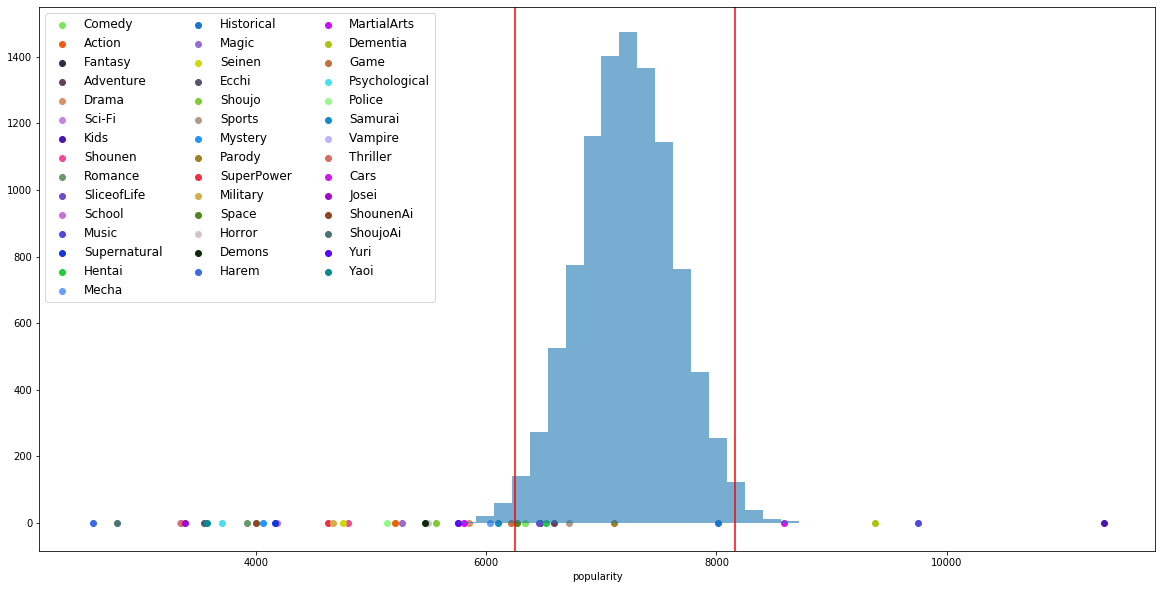

In [11]:
plot_hypothesis_test_genre(random_pop_results, "popularity", pop_confidence_interval)

Observando o segundo gráfico acima, é claro que vários gêneros também estão fora do intervalo de confiança, logo pode-se rejeitar com algum grau de certeza a hipótese nula de que a variação de popularidade de animes seria apenas por chance.

Além disso, pode-se dizer que as estatísticas favorecem a hipótese alternativa de que o gênero impacta na popularidade de um anime. Alguns gêneros estão bem mais populares do que a popularidade média (como Harem e ShoujoAi), e a maioria deles acima do intervalo de confiança.

### Número de episódios

Pode ser feita uma análise semelhante à feita com gênero mas com o número de episódios de um anime. Um anime ser maior em extensão (mais episódios) impacta na nota/popularidade dele?

Já temos os histogramas de nota e popularidade das amostras aleatórias, que podem ser reaproveitados. Vamos escolher uma média de nota e popularidade para animes com um número de episódios maior do que uma porcentagem de todos os animes (digamos maiores que 95% dos animes registrados).

In [12]:
anime_df = df[["anime_id", "title", "score", "popularity", "episodes"]].sort_values(by=['episodes'], ascending=False)

## Conseguindo a média de episódios de animes acima de uma porcentagem do restante
def get_episode_threshold_mean(df, threshold):
    threshold_episodes = int(np.percentile(df["episodes"], threshold))
    top_episode_anime = anime_df.loc[anime_df["episodes"] >= threshold_episodes]
    return top_episode_anime

## Por exemplo, dar a média de episódio dos 5% de animes com mais episódios no total
get_episode_threshold_mean(anime_df, 95)

,anime_id,title,score,popularity,episodes
11627,12393,Oyako Club,5.96,10337,1818
11216,2471,Doraemon (1979),7.73,2666,1787
3814,23349,Kirin Monoshiri Yakata,5.98,11264,1565
3815,6277,Manga Nippon Mukashibanashi (1976),6.37,9150,1471
7764,8213,Hoka Hoka Kazoku,5.93,10491,1428
...,...,...,...,...,...
3806,10528,Duel Masters Cross Shock,6.41,7846,50
11911,11017,Battle Spirits: Heroes,6.57,8043,50
10781,13179,Little Charo 2,5.95,11752,50
8825,150,Blood+,7.76,277,50


In [13]:
## Plotando os testes de hipótese para número de episódios
def plot_hypothesis_test_episodes(results, column, conf_interval):
    plt.figure(figsize=(10,5)) 
    plt.hist(results, bins = 20, alpha=0.6)
    
    top_episodes = get_episode_threshold_mean(anime_df, 95)
    top_ep_mean = top_episodes[column].mean()
    plt.scatter(top_ep_mean, 0, color='orange', label="top 5%")
    plt.legend(loc=2, prop={'size': 12}, ncol=3)
    plt.xlabel(column)
    plt.axvline(x=conf_interval[0], lw=1.5, color='red')
    plt.axvline(x=conf_interval[1], lw=1.5, color='red')
    plt.show()

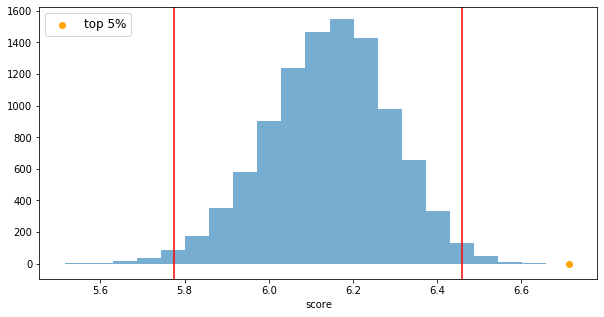

In [14]:
plot_hypothesis_test_episodes(random_score_results, "score", score_confidence_interval)

Observando o gráfico acima, é evidente que os animes com mais episódios estão fora desse intervalo de confiança, logo pode-se rejeitar com algum grau de certeza a hipótese nula de que a variação de nota de animes seria apenas por chance.

Além disso, pode-se dizer que as estatísticas favorecem a hipótese alternativa de que o número de episódios impacta na nota de um anime, já que os 5% de animes com mais episódios estão longe do intervalo de confiança determinado para notas.

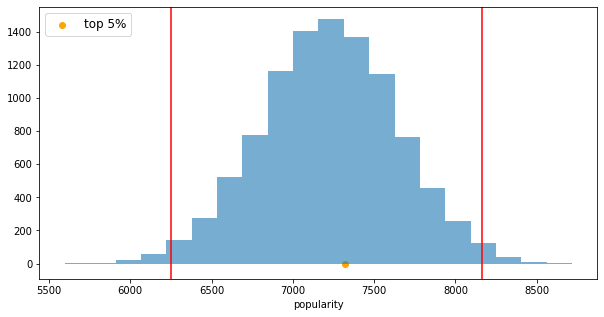

In [15]:
plot_hypothesis_test_episodes(random_pop_results, "popularity", pop_confidence_interval)

Entretanto, o gráfico de popularidade mostra uma diferença. A observação condiz quase que perfeitamente com a média das amostras aleatórias. 

Com isso, pode-se concluir que, nesse caso, a hipótese nula de que o número de episódios não impacta na popularidade de um anime (e variações são apenas devido ao acaso) é válida.

### Temporada de lançamento

Pode ser feita uma análise semelhante às feitas anteriormente com a temporada (ou estação) de lançamento de um anime. Dada uma estação, o anime é impactado em nota/popularidade por sua temporada de lançamento?

Nessa análise, devemos tomar um cuidado: alguns animes não tem dados de temporada de lançamento. Nesse caso, as amostras aleatórias de média de nota e popularidade serão refeitas, mas considerando apenas animes que tem temporada de lançamento no banco de dados.

In [16]:
## Separando os animes por estação/temporada de lançamento
anime_df = df[["anime_id", "title", "score", "popularity", "premiered"]]

anime_df["premiered"] = df["premiered"].str.split().str[0]

## Deixando apenas aqueles que possuem dados de temporada
anime_df = anime_df.dropna(axis=0)
anime_df

/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,anime_id,title,score,popularity,premiered
0,11013,Inu x Boku SS,7.63,231,Winter
1,2104,Seto no Hanayome,7.89,366,Spring
2,5262,Shugo Chara!! Doki,7.55,1173,Fall
3,721,Princess Tutu,8.21,916,Summer
4,12365,Bakuman. 3rd Season,8.67,426,Fall
...,...,...,...,...,...
14395,37778,Pastel Life,6.62,7722,Spring
14410,37662,Shinya! Tensai Bakabon,0.00,12783,Summer
14438,37428,Chara to Otamajakushi Shima,0.00,14456,Spring
14459,37787,Space Bug,0.00,14280,Summer


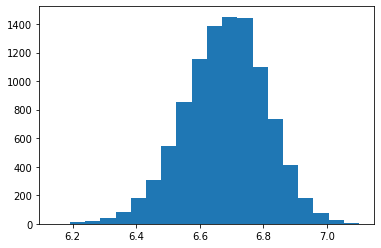

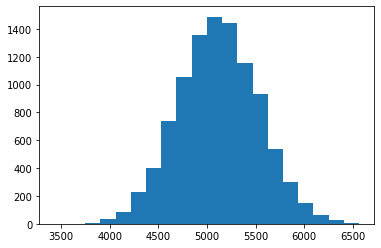

In [17]:
## Refazendo os resultados da amostragem para apenas animes com dados de temporada no banco

random_score_results = compute_mean_model(anime_df, "score")
plt.hist(random_score_results, bins = 20)
plt.show()
random_pop_results = compute_mean_model(anime_df, "popularity")
plt.hist(random_pop_results, bins = 20)
plt.show()

score_confidence_interval = compute_confidence_interval(random_score_results)
pop_confidence_interval = compute_confidence_interval(random_pop_results)

In [18]:
## Lista de temporadas
list_of_seasons = ["Spring", "Summer", "Fall", "Winter"]

In [19]:
## Plotando os testes de hipótese

def plot_hypothesis_test_season(results, column, conf_interval):
    plt.figure(figsize=(10,5)) 
    plt.hist(results, bins = 20, alpha=0.6)
    for season in list_of_seasons:
        season_mean = anime_df.loc[anime_df["premiered"] == season][column].mean()
        plt.scatter(season_mean, 0, color=np.random.rand(3,), label=season)
    plt.legend(loc=2, prop={'size': 12})
    plt.xlabel(column)
    plt.axvline(x=conf_interval[0], lw=1.5, color='red')
    plt.axvline(x=conf_interval[1], lw=1.5, color='red')
    plt.show()

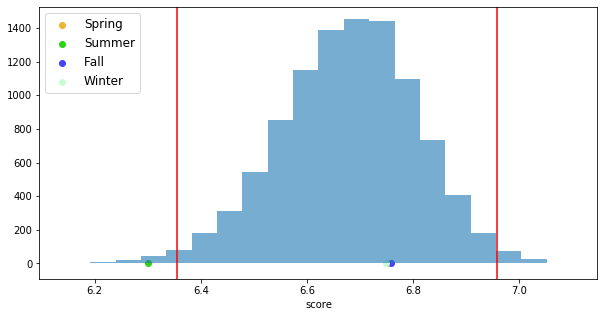

In [20]:
plot_hypothesis_test_season(random_score_results, "score", score_confidence_interval)

Pelos resultados acima, a hipótese nula de que a temporada não impacta na nota do anime (e que variações são apenas devido ao acaso) pode ser descartada, já que a média de nota de animes lançados no verão está fora do intervalo de confiança estipulado.

Essa evidência favorece a hipótese alternativa de que animes lançados no verão são mais bem avaliados que outros (possivelmente por ser uma boa temporada para lançar, coincidindo com o período de férias escolares)

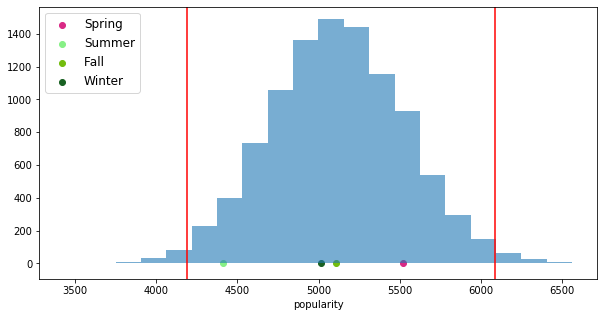

In [21]:
plot_hypothesis_test_season(random_pop_results, "popularity", pop_confidence_interval)

O mesmo não pode ser dito para a popularidade de animes, e os testes confirmam a hipótese nula de que a temporada de lançamento não afeta a popularidade do anime (e que variações são devidas ao acaso).

## Regressao Logistica

A regressao logistica, apesar do nome, e um algoritmo de classificacao. A partir de variaveis numericas e categoricas, podemos prever a qual grupo uma dada "instancia" dos dados pertence. No caso em questao, vamos classificar os animes quanto ao genero, e para isso vamos usar as variaveis: numero de episodios, popularidade e pontuacao, sendo os dois ultimos obtidos pelas avaliacoes dos usuarios.

### Tratamento

Existem diversos generos de anime, sendo assim, aplicamos uma regressao logistica multinomial, que e usada quando a variavel dependente(genero) pode assumir mais de dois valores.

Alem disso, vamos selecionar apenas animes que contem mais do que 1 episodio. Isto e para evitar que filmes e OVAs sejam contabilizados.

In [145]:
df = pd.read_csv("anime_cleaned.csv")
df = df[['anime_id', 'title', 'episodes', 'popularity', 'score', 'genre']]
df = df.loc[df['episodes'] > 1] #seleciona apenas animes com mais de 1 episodio

animes = df.copy()

#para cada linha do dataframe, obtem o conjunto de generos e 
#seleciona o primeiro valor do conjunto como sendo o unico genero
for index, row in df.iterrows():
    genero = row['genre'].split(", ")
    animes.ix[[index], ['genre']] = genero[0]
    
animes

/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


,anime_id,title,episodes,popularity,score,genre
0,11013,Inu x Boku SS,12,231,7.63,Comedy
1,2104,Seto no Hanayome,26,366,7.89,Comedy
2,5262,Shugo Chara!! Doki,51,1173,7.55,Comedy
3,721,Princess Tutu,38,916,8.21,Comedy
4,12365,Bakuman. 3rd Season,25,426,8.67,Comedy
5,6586,Yume-iro Pâtissière,50,1630,8.03,Kids
6,178,Ultra Maniac,26,2490,7.26,Magic
7,2787,Shakugan no Shana II (Second),24,332,7.72,Action
8,4477,Nodame Cantabile: Paris-hen,11,988,8.24,Music
9,853,Ouran Koukou Host Club,26,69,8.34,Comedy


### Regressao

No dataset original cada anime poderia pertencer a mais de um genero, entretanto, talvez por limitacao da biblioteca utilizada, so conseguimos realizar a regressao logistica com uma variavel dependente (nao podemos criar variaveis dummy para os generos). Sendo assim, optou-se por selecionar apenas um genero para cada anime.

Os generos nao aparentavam estar em nenhuma ordem especifica, nem alfabetica e nem de relevancia, entao, determinou-se que cada anime seria categorizado pelo primeiro genero lido de seu conjunto.

In [146]:
#aplicando a regressao logistica
    
X = animes[['episodes', 'popularity', 'score']] #variaveis independentes

X = StandardScaler().fit_transform(X) #normaliza os dados

y = animes['genre'] #variavel dependente, i.e. o que queremos categorizar

clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=15000, multi_class='multinomial').fit(X, y)
clf.score(X, y) #calcula a acuracia da regressao 


0.3222145008107482

A acuracia da regressao foi bem baixa, acertando cerca de 1/3 das previsoes.

Abaixo temos uma funcao que calcula novamente a porcentagem de acerto, mas que tambem leva em conta se o genero previsto esta entre o conjunto de generos no dataframe original.

Isto e, se o anime foi previsto como pertencente ao genero 'Shounen', contabilizamos um acerto se este genero esta presente no conjunto de generos no dataset original.

In [147]:
def calcula_porcentagem(x, y):
    return x * 100 / y

#recebe o dataframe nao alterado, os valores utilizados na regressao e um array com a previsoes feitas
def mede_acuracia(df, X, previsoes):
    acertos = 0
    total = 0
    iteracao = 0
    
    for index, row in df.iterrows(): #itera por cada linha da dataframe original
        previsto = previsoes[iteracao]
        genero = row['genre'].split(", ") #obtem o conjunto de generos da linha atual
        
        #caso o genero esteja presente no dataset original, contabilizamos um acerto
        for i in genero:
            if(i == previsto):
                acertos += 1
                break
        
        iteracao += 1
        total += 1
        
    return calcula_porcentagem(acertos, total)

previsoes = clf.predict(X[0:4317, :]) #obtem as previsoes feitas
mede_acuracia(df, X, previsoes)
        

37.64188093583507

Como podemos ver, mesmo levando em conta o conjunto de generos de cada anime, a acuracia da regressao permanece baixa, e o aumento da porcentagem de acertos foi pequeno. Antes de tirar mais conclusoes, vamos observar algumas das previsoes feitas.

In [148]:
#300 primeiras previsoes
clf.predict(X[0:300, :])

array(['Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Comedy', 'Action', 'Comedy',
       'Comedy', 'Comedy', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Comedy', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Comedy', 'Action',
       'Comedy', 'Action', 'Action', 'Action', 'Comedy', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Acti

A grande maioria das previsoes de genero sao "Action" ou "Comedy". Qualquer semblante de acerto parece se dar pelo fato de que a maioria dos animes se encontra em uma destas categorias.

Isto sugere que os dados usados nao sao o suficiente para classificar o genero adequadamente, ou que a regressao logistica nao e o melhor modelo para faze-lo. 